In [1]:
import matplotlib.pyplot as plt
from matplotlib import image
from scipy.spatial.distance import cdist
import numpy as np
import pandas as pd
import cv2
import os
from BfTableGenerator import TDmapLoader
from tqdm import tqdm
from Utils import *
from open3d.web_visualizer import draw
from joblib import Parallel, delayed
from VisulizerTools import *
from DDBSCAN import Raster_DBSCAN
plt.rcParams["font.family"] = "Times New Roman"

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
[Open3D INFO] Resetting default logger to print to terminal.


In [2]:
aggregated_map = []
Inten_maps = []
pcap_path = r'D:\LiDAR_Data\MidTown\California\2021-12-9-9-30-0.pcap'
end_frame = 2000
lidar_reader = TDmapLoader(pcap_path)
frame_gen = lidar_reader.frame_gen()
for i in tqdm(range(end_frame)):
    Frame = next(frame_gen)
    if Frame is None:
        break 
    Td_map,Int_map = Frame
    aggregated_map.append(Td_map)
    Inten_maps.append(Int_map)
aggregated_map = np.array(aggregated_map)
Inten_maps = np.array(Inten_maps)

100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [01:16<00:00, 26.11it/s]


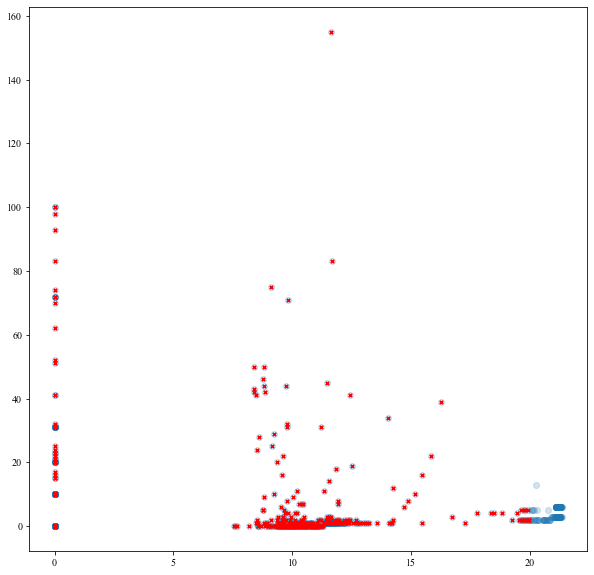

In [20]:
laser_id = theta_raw[12] == theta
azimuth_channel = int(np.around((30000/100)/0.2)) + 30
dis_process = aggregated_map[:,laser_id,azimuth_channel] 
intensity_process = Inten_maps[:,laser_id,azimuth_channel] 
ind_fore = dis_process < 20
plt.figure(figsize=(10,10))
plt.scatter(dis_process,intensity_process,alpha=0.2)
plt.scatter(dis_process[ind_fore],intensity_process[ind_fore], c = 'r', marker = 'x', s = 12)
plt.show()

In [16]:
background_object = cv2.createBackgroundSubtractorMOG2(history = 10000, varThreshold = 0.3, detectShadows = None)
background_object.setNMixtures(2)
background_object.setBackgroundRatio(0.6)

In [17]:
for i in tqdm(range(10000)):
#     image = get_image(aggregated_map[i],Inten_maps[i])
    fgmsk = background_object.apply(aggregated_map[i])

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:08<00:00, 1155.39it/s]


In [18]:
ind = 36
# image = get_image(aggregated_map[ind],Inten_maps[ind])
fgmsk = background_object.apply(aggregated_map[ind])
Foreground_map = (fgmsk != 0)
Td_map = aggregated_map[ind]
pcd = get_pcd_colored(Td_map,Foreground_map)
draw(pcd,height=1000,width=1000)


WebVisualizer(window_uid='window_3')

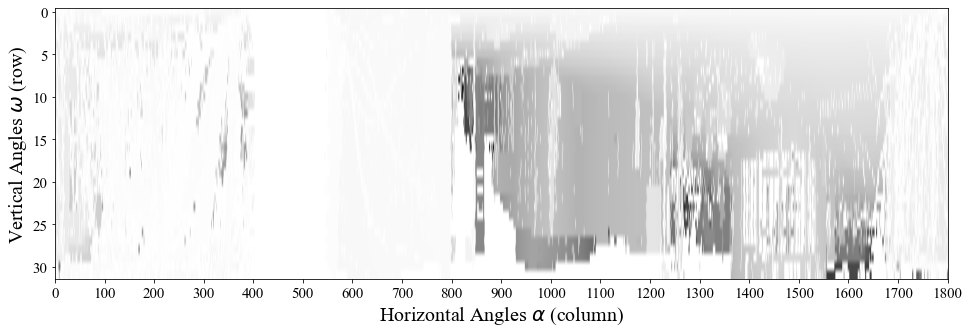

In [32]:
plt.figure(figsize=(16,5))
plt.imshow(aggregated_map[235], aspect='auto',cmap = 'binary')
plt.xlabel(r'Horizontal Angles $\mathit{\alpha}$ (column)',fontsize = 20)
plt.ylabel(r'Vertical Angles $\mathit{\omega} $ (row)',fontsize = 20)
plt.yticks(fontsize = 15)
plt.xticks(np.arange(0,1900,100),fontsize = 15)
plt.savefig(r'C:\Users\zhChe\OneDrive - nevada.unr.edu\ITSmanuscript\Figs\Picture4.tif',dpi = 600)


[22.432]
1463


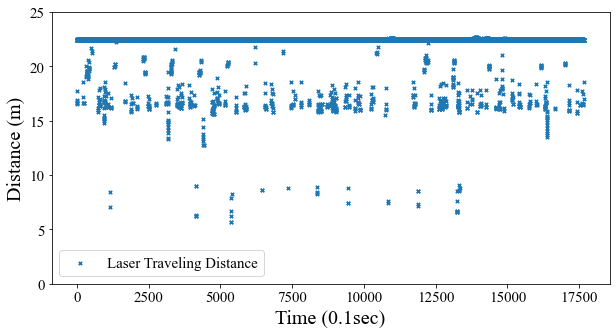

In [6]:
laser_id = theta_raw[12] == theta
azimuth_channel = int(np.around((28661/100)/0.2)) + 30
print(aggregated_map[-4,laser_id,azimuth_channel])
print(azimuth_channel)
temp = aggregated_map[:,laser_id,azimuth_channel].copy()
temp = temp[temp != 0]
plt.figure(figsize=(10,5))
plt.scatter(np.arange(len(temp)),temp,s = 12, marker = 'x', label = "Laser Traveling Distance")
plt.legend(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.ylabel('Distance (m)',fontsize = 20)
plt.xlabel('Time (0.1sec)',fontsize = 20)
plt.ylim(0,25)
# plt.savefig(r'C:\Users\zhChe\OneDrive - nevada.unr.edu\ITSmanuscript\Figs\Picture5.tif', dpi = 600)
plt.show()

[22.488]
1463


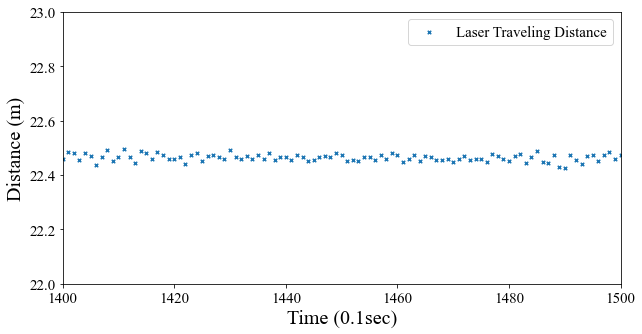

In [16]:
laser_id = theta_raw[12] == theta
azimuth_channel = int(np.around((28661/100)/0.2)) + 30
print(aggregated_map[-4,laser_id,azimuth_channel])
print(azimuth_channel)
temp = aggregated_map[:,laser_id,azimuth_channel].copy()
temp = temp[temp != 0]
plt.figure(figsize=(10,5))
plt.scatter(np.arange(len(temp)),temp,s = 12, marker = 'x', label = "Laser Traveling Distance")
plt.legend(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.ylabel('Distance (m)',fontsize = 20)
plt.xlabel('Time (0.1sec)',fontsize = 20)
plt.ylim(22,23)
plt.xlim(1400,1500)
plt.savefig(r'C:\Users\zhChe\OneDrive - nevada.unr.edu\ITSmanuscript\Figs\Picture6.tif', dpi = 600)
plt.show()

[22.488]
1463


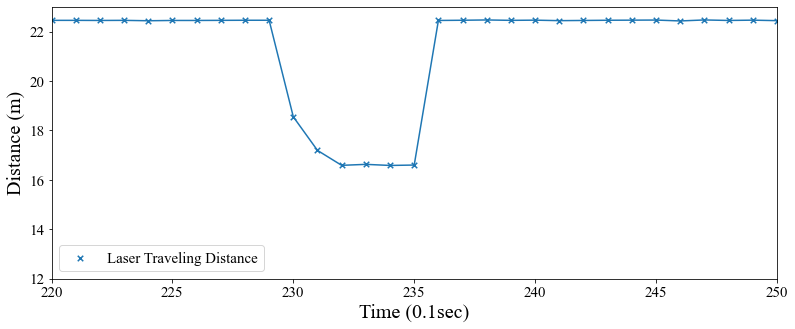

In [28]:
laser_id = theta_raw[12] == theta
azimuth_channel = int(np.around((28661/100)/0.2)) + 30
print(aggregated_map[-4,laser_id,azimuth_channel])
print(azimuth_channel)
temp = aggregated_map[:,laser_id,azimuth_channel].copy()
temp = temp[temp != 0]
plt.figure(figsize=(13,5))
plt.scatter(np.arange(len(temp)),temp,s = 30, marker = 'x', label = "Laser Traveling Distance")
plt.plot(np.arange(len(temp)),temp)

plt.legend(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.ylabel('Distance (m)',fontsize = 20)
plt.xlabel('Time (0.1sec)',fontsize = 20)
plt.ylim(12,23)
plt.xlim(220,250)
plt.savefig(r'C:\Users\zhChe\OneDrive - nevada.unr.edu\ITSmanuscript\Figs\Picture8.tif', dpi = 600)
plt.show()

[33.608]
1429


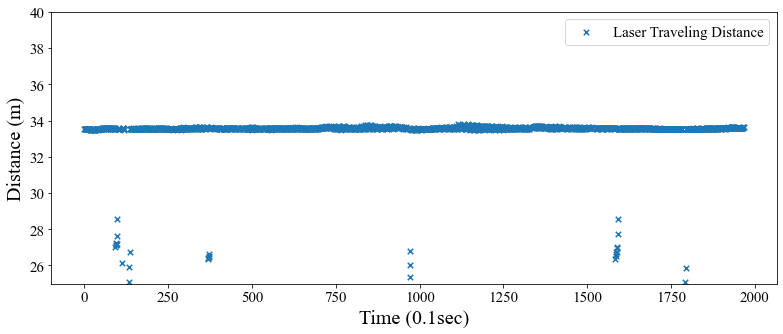

In [12]:
laser_id = theta_raw[24] == theta
azimuth_channel = int(np.around((27979/100)/0.2)) + 30
print(aggregated_map[-4,laser_id,azimuth_channel])
print(azimuth_channel)
temp = aggregated_map[:,laser_id,azimuth_channel].copy()
temp = temp[temp != 0]
plt.figure(figsize=(13,5))
plt.scatter(np.arange(len(temp)),temp,s = 30, marker = 'x', label = "Laser Traveling Distance")
# plt.plot(np.arange(len(temp)),temp)
# plt.grid()
plt.legend(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.ylabel('Distance (m)',fontsize = 20)
plt.xlabel('Time (0.1sec)',fontsize = 20)
plt.ylim(25,40)
# plt.xlim(220,250)
# plt.savefig(r'C:\Users\zhChe\OneDrive - nevada.unr.edu\ITSmanuscript\Figs\Picture8.tif', dpi = 600)
plt.show()

[33.608]
1429


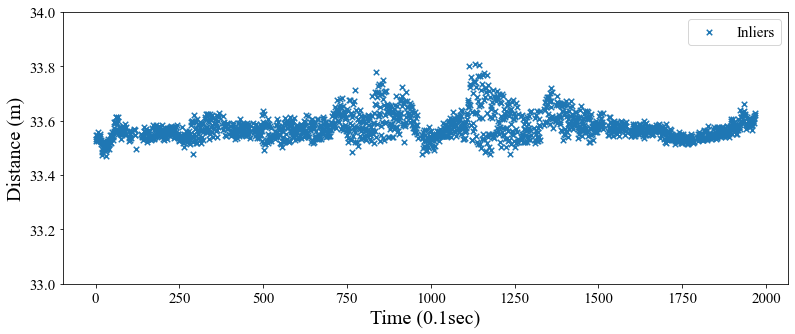

In [32]:
laser_id = theta_raw[24] == theta
azimuth_channel = int(np.around((27979/100)/0.2)) + 30
print(aggregated_map[-4,laser_id,azimuth_channel])
print(azimuth_channel)
temp = aggregated_map[:,laser_id,azimuth_channel].copy()
temp = temp[temp != 0]
plt.figure(figsize=(13,5))
plt.scatter(np.arange(len(temp)),temp,s = 30, marker = 'x', label = "Inliers")
# plt.plot(np.arange(len(temp)),temp)
# plt.grid()
plt.legend(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.ylabel('Distance (m)',fontsize = 20)
plt.xlabel('Time (0.1sec)',fontsize = 20)
plt.ylim(33,34)
# plt.xlim(220,250)
plt.savefig(r'C:\Users\zhChe\OneDrive - nevada.unr.edu\ITSmanuscript\Figs\Picture10.tif', dpi = 600)
plt.show()

[33.608]
1429


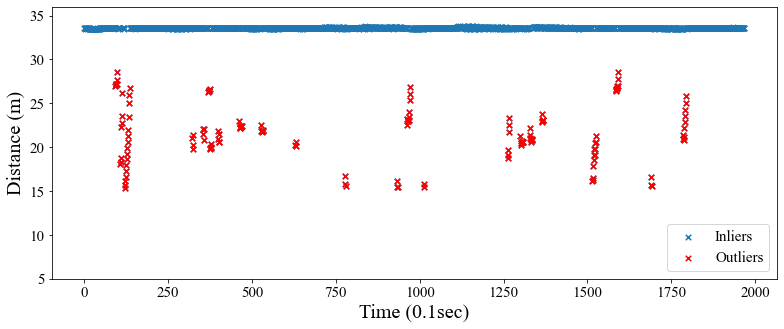

In [33]:
laser_id = theta_raw[24] == theta
azimuth_channel = int(np.around((27979/100)/0.2)) + 30
print(aggregated_map[-4,laser_id,azimuth_channel])
print(azimuth_channel)
temp = aggregated_map[:,laser_id,azimuth_channel].copy()
temp = temp[temp != 0]
plt.figure(figsize=(13,5))
plt.scatter(np.arange(len(temp)),temp,s = 30, marker = 'x', label = "Inliers")
temp_out = temp[temp < 33.4]
plt.scatter(np.where(temp < 33.4)[0],temp_out,s = 30, marker = 'x', label = "Outliers",c = 'r')
# plt.plot(np.arange(len(temp)),temp)
# plt.grid()
plt.legend(fontsize = 15,loc = 'lower right')
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.ylabel('Distance (m)',fontsize = 20)
plt.xlabel('Time (0.1sec)',fontsize = 20)
plt.ylim(5,36)
# plt.xlim(220,250)
plt.savefig(r'C:\Users\zhChe\OneDrive - nevada.unr.edu\ITSmanuscript\Figs\Picture9.tif', dpi = 600)
plt.show()

In [3]:
def get_thred(ts,d ,thred_s ,N ,delta_thred ,step):# Ransac Para
    ts_temp = ts.copy()
    ts_temp[ts_temp == 0] = 1000
    
    for i in range(N):
        sample = np.random.choice(ts_temp,replace=False)
        set_d = ts_temp[(ts_temp > sample - d)&(ts_temp < sample + d)]
        condition_thred = len(set_d)/len(ts_temp) > thred_s
        if condition_thred :
            break
            
    cur_thred = sample
    if i == (N -1):
        cur_thred = 1000


    while True:
        next_thred = cur_thred - step
        if (len(ts_temp[ts_temp > next_thred])/len(ts_temp) - len(ts_temp[ts_temp > cur_thred])/len(ts_temp)) < delta_thred:
            break
        cur_thred = next_thred

    return next_thred

def gen_bckmap(aggregated_maps , d, thred_s, N , delta_thred, step):
    thred_map = np.zeros((32,1800))
    for i in range(thred_map.shape[0]):
        for j in range(thred_map.shape[1]):
            thred_map[i,j] = get_thred(aggregated_maps[:,i,j],d,thred_s ,N, delta_thred ,step )
    return thred_map

In [4]:
thred_map = gen_bckmap(aggregated_map, d = 0.5, thred_s = 0.3, N = 20, delta_thred = 0.001, step = 0.1)

In [14]:
np.save(r'D:\Test\bck.npy',thred_map)

In [13]:
Td_map = aggregated_map[482]
Colored_map = Td_map < thred_map
# Colored_map[:,700:900] = 1
pcd = get_pcd_colored(Td_map,Colored_map)
draw(pcd,height=1000,width=1000)


WebVisualizer(window_uid='window_3')

In [ ]:
pcd = get_pcd_uncolored(thred_map)
draw(pcd,height=1000,width=1000)

[33.608]
1429


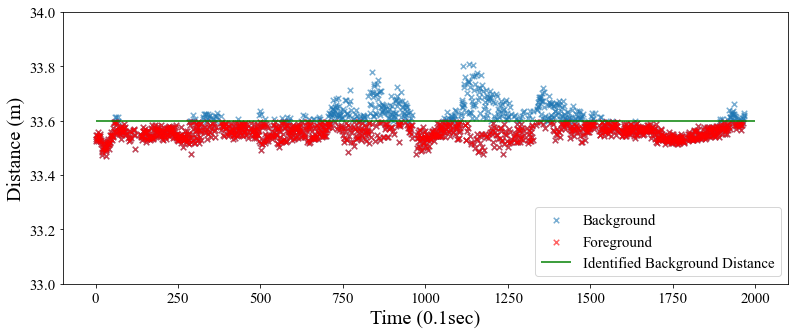

In [74]:
laser_id = theta_raw[24] == theta
azimuth_channel = int(np.around((27979/100)/0.2)) + 30
print(aggregated_map[-4,laser_id,azimuth_channel])
print(azimuth_channel)
temp = aggregated_map[:,laser_id,azimuth_channel].copy()
temp = temp[temp != 0]
plt.figure(figsize=(13,5))
plt.scatter(np.arange(len(temp)),temp,s = 30, marker = 'x', label = "Background", alpha = 0.6)
temp_out = temp[temp < 33.6]
plt.scatter(np.where(temp < 33.6)[0],temp_out,s = 30, marker = 'x', label = "Foreground",c = 'r', alpha = 0.6)
plt.hlines(33.6,0,2000,color = 'g', label = "Identified Background Distance",)
plt.legend(fontsize = 15,loc = 'lower right')
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.ylabel('Distance (m)',fontsize = 20)
plt.xlabel('Time (0.1sec)',fontsize = 20)
plt.ylim(33,34)
# plt.xlim(220,250)
plt.savefig(r'C:\Users\zhChe\OneDrive - nevada.unr.edu\ITSmanuscript\Figs\Picture13.tif', dpi = 600)
plt.show()

[33.608]
1429


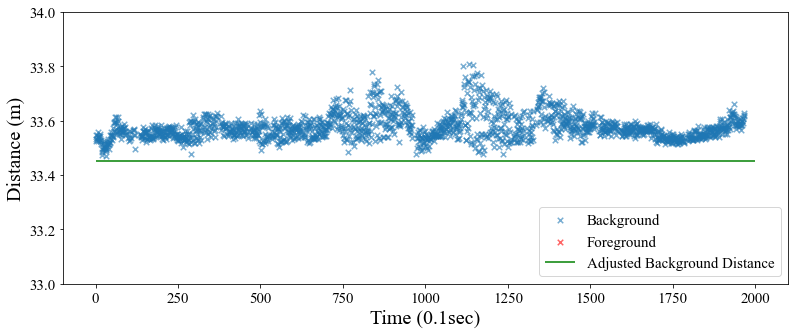

In [77]:
laser_id = theta_raw[24] == theta
azimuth_channel = int(np.around((27979/100)/0.2)) + 30
print(aggregated_map[-4,laser_id,azimuth_channel])
print(azimuth_channel)
temp = aggregated_map[:,laser_id,azimuth_channel].copy()
temp = temp[temp != 0]
plt.figure(figsize=(13,5))
plt.scatter(np.arange(len(temp)),temp,s = 30, marker = 'x', label = "Background", alpha = 0.6)
temp_out = temp[temp < 33.4]
plt.scatter(np.where(temp < 33.4)[0],temp_out,s = 30, marker = 'x', label = "Foreground",c = 'r', alpha = 0.6)
plt.hlines(33.45,0,2000,color = 'g', label = "Adjusted Background Distance")
plt.legend(fontsize = 15,loc = 'lower right')
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.ylabel('Distance (m)',fontsize = 20)
plt.xlabel('Time (0.1sec)',fontsize = 20)
plt.ylim(33,34)
# plt.xlim(220,250)
plt.savefig(r'C:\Users\zhChe\OneDrive - nevada.unr.edu\ITSmanuscript\Figs\Picture14.tif', dpi = 600)
plt.show()

[33.608]
1429


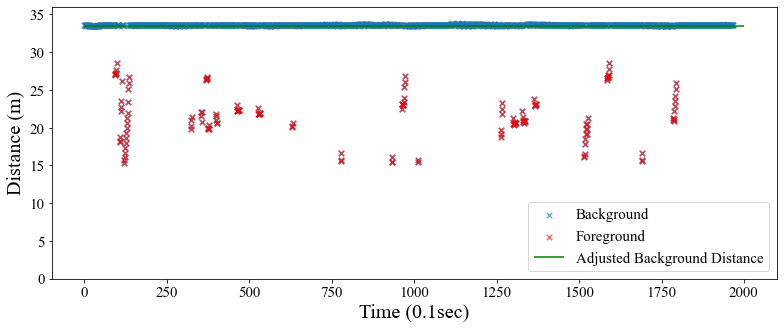

In [83]:
laser_id = theta_raw[24] == theta
azimuth_channel = int(np.around((27979/100)/0.2)) + 30
print(aggregated_map[-4,laser_id,azimuth_channel])
print(azimuth_channel)
temp = aggregated_map[:,laser_id,azimuth_channel].copy()
temp = temp[temp != 0]
plt.figure(figsize=(13,5))
plt.scatter(np.arange(len(temp)),temp,s = 30, marker = 'x', label = "Background", alpha = 0.6)
temp_out = temp[temp < 33.4]
plt.scatter(np.where(temp < 33.4)[0],temp_out,s = 30, marker = 'x', label = "Foreground",c = 'r', alpha = 0.6)
plt.hlines(33.45,0,2000,color = 'g', label = "Adjusted Background Distance")
plt.legend(fontsize = 15,loc = 'lower right')
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.ylabel('Distance (m)',fontsize = 20)
plt.xlabel('Time (0.1sec)',fontsize = 20)
plt.ylim(0,36)
# plt.xlim(220,250)
plt.savefig(r'C:\Users\zhChe\OneDrive - nevada.unr.edu\ITSmanuscript\Figs\Picture15.tif', dpi = 600)
plt.show()

[33.608]
1429


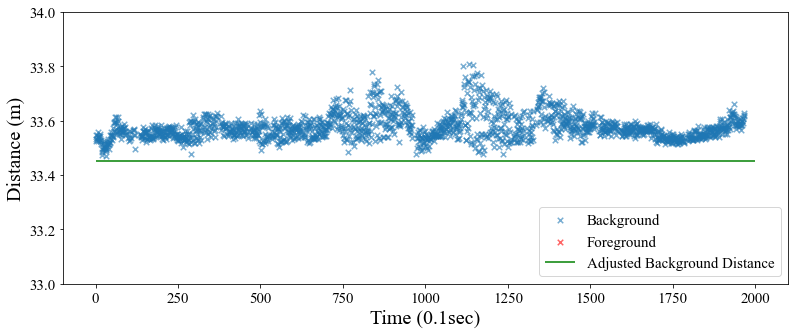

In [84]:
laser_id = theta_raw[24] == theta
azimuth_channel = int(np.around((27979/100)/0.2)) + 30
print(aggregated_map[-4,laser_id,azimuth_channel])
print(azimuth_channel)
temp = aggregated_map[:,laser_id,azimuth_channel].copy()
temp = temp[temp != 0]
plt.figure(figsize=(13,5))
plt.scatter(np.arange(len(temp)),temp,s = 30, marker = 'x', label = "Background", alpha = 0.6)
temp_out = temp[temp < 33.4]
plt.scatter(np.where(temp < 33.4)[0],temp_out,s = 30, marker = 'x', label = "Foreground",c = 'r', alpha = 0.6)
plt.hlines(33.45,0,2000,color = 'g', label = "Adjusted Background Distance")
plt.legend(fontsize = 15,loc = 'lower right')
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.ylabel('Distance (m)',fontsize = 20)
plt.xlabel('Time (0.1sec)',fontsize = 20)
plt.ylim(33,34)
# plt.xlim(220,250)
# plt.savefig(r'C:\Users\zhChe\OneDrive - nevada.unr.edu\ITSmanuscript\Figs\Picture14.tif', dpi = 600)
plt.show()

In [35]:
db = Raster_DBSCAN(window_size=[5,19],eps = 1.5,min_samples= 14,Td_map_szie=thred_map.shape)

In [7]:
Td_map_0 = aggregated_map[1312]
Td_map_1 = aggregated_map[229]
Foreground_0 = (Td_map_0 < thred_map)&(Td_map_0 != 0)
Foreground_1 = (Td_map_1 < thred_map)&(Td_map_1 != 0)
Labeling_map_0 = db.fit_predict(Td_map= Td_map_0,Foreground_map=Foreground_1)
Labeling_map_1 = db.fit_predict(Td_map= Td_map_0,Foreground_map=Foreground_0)
unique_label_cur,unique_label_next = np.unique(Labeling_map_0)[1:],np.unique(Labeling_map_1)[1:]

In [36]:
Td_map = aggregated_map[1312]
Foreground_map = (Td_map < thred_map)&(Td_map != 0)
Labeling_map = db.fit_predict(Td_map= Td_map,Foreground_map=Foreground_map)


In [37]:
pcd = get_pcd_colored(Td_map,Labeling_map)
draw(pcd,width=1000,height=1000)

WebVisualizer(window_uid='window_2')

In [9]:
pcd = get_pcd_colored_specified(Td_map,Labeling_map,[0,1])
draw(pcd,width=1000,height=1000)

WebVisualizer(window_uid='window_1')

In [10]:
rows_1,cols_1 = np.where(Labeling_map == 0)
rows_2,cols_2 = np.where(Labeling_map == 1)

In [11]:
cols_1

array([925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 936, 937, 938,
       939, 940, 941, 942, 943, 944, 945, 946, 947, 949, 951, 952, 954,
       955, 956, 959, 960, 961, 962, 963, 966, 967, 968, 969, 970, 972,
       973, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 986, 987,
       957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969,
       970, 971, 972, 973, 974, 975, 977], dtype=int64)

In [12]:
rows_1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2], dtype=int64)

In [13]:
cols_2

array([ 991,  993,  994,  995,  996,  997,  998, 1000, 1001, 1002, 1003,
       1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014,
       1015, 1016, 1017, 1018, 1019, 1020, 1021], dtype=int64)

In [14]:
rows_2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [16]:
pd.DataFrame(Labeling_map).to_csv(r'D:/Test/LABEL.csv', index = False)

In [22]:
Sub_foremap,Sub_indmap,Sub_tdmap = db.Sub_foremap,db.Sub_indmap,db.Sub_tdmap

In [23]:
valid_windows = db.valid_windows

In [28]:
center_td_dist = Sub_tdmap[:,db.Height_fringe,db.Width_fringe].reshape(-1,1,1)

In [29]:
center_td_dist.shape

(57600, 1, 1)

In [32]:
Sub_tdmap.shape

(57600, 5, 19)

In [156]:
IoU_matrix = np.zeros((unique_label_cur.shape[0],unique_label_next.shape[0]))

In [157]:
for i,pair in enumerate(pairs_intersect):
    cur_label,next_label = pair[0],pair[1]
    Intersection_p = counts_intersect[i]
    A_p = counts_union[(pairs_union[:,0] == cur_label)]
    if A_p.size == 0:
        A_p = 0
    B_p = counts_union[(pairs_union[:,1] == next_label)]
    if B_p.size == 0:
        B_p = 0
    Union_p = Intersection_p + A_p + B_p
    IoU_matrix[unique_label_cur == cur_label,unique_label_next == next_label] = Intersection_p/Union_p

In [158]:
IoU_matrix

array([[0.70982143, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.57142857,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.86627907, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.52083333, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.18518519, 0.        , 0.        , 0.        ]])

In [63]:
%%timeit
pairs,counts = get_ovlp_pairs(Labeling_map_0,Labeling_map_1)

17.5 ms ± 74.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [66]:
%%timeit
cooresponding_map = np.array([Labeling_map_0.flatten(),Labeling_map_1.flatten()]).T
pairs,counts = np.unique(cooresponding_map,return_counts = True, axis = 0)

17.9 ms ± 101 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [64]:
%%timeit
pairs,counts = np.unique(cooresponding_map,return_counts = True, axis = 0)

9.84 ms ± 45.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


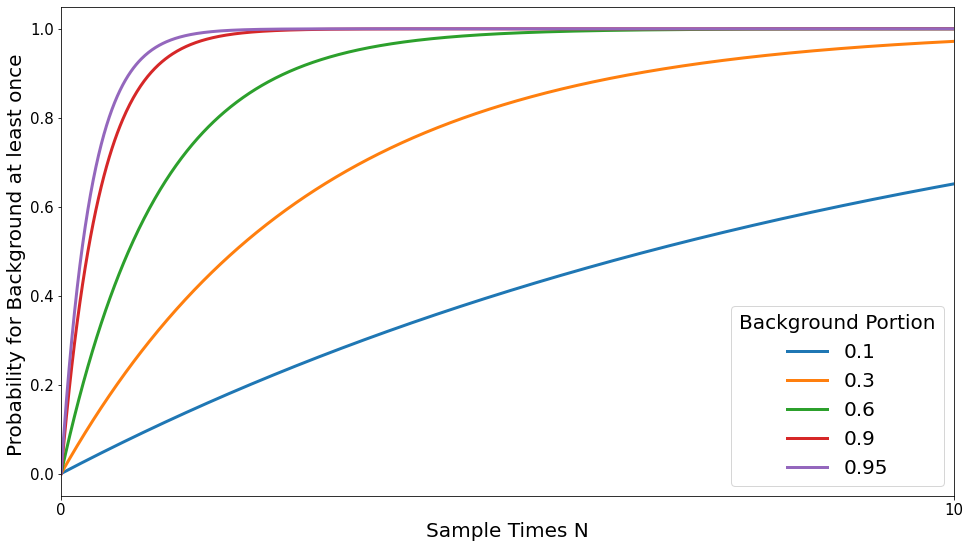

In [97]:
plt.figure(figsize=(16,9))
p_bcks = [0.1,0.3,0.6,0.9,0.95]
N = np.arange(0,100,0.01)
for p_bck in p_bcks:
    p_p1 = 1 - (1- p_bck)**N
    plt.plot(p_p1,label = p_bck,linewidth = 3)
plt.legend(fontsize = 20, title="Background Portion",title_fontsize=20)
plt.xlabel('Sample Times N',fontsize = 20)
plt.ylabel('Probability for Background at least once ',fontsize = 20)
plt.xticks(np.arange(0,11000,1000),np.arange(0,110,10),fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlim(0,1000)
# plt.savefig()
plt.show()

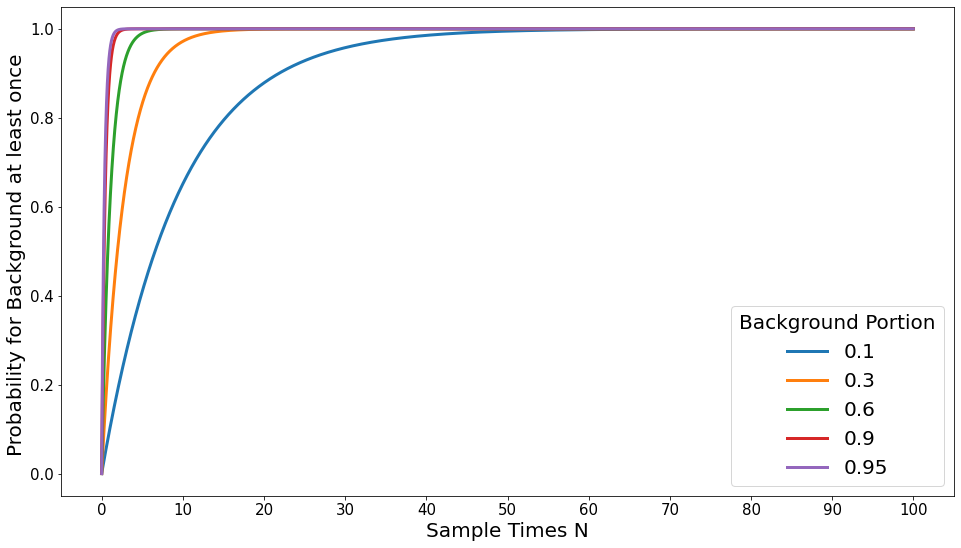

In [98]:
plt.figure(figsize=(16,9))
p_bcks = [0.1,0.3,0.6,0.9,0.95]
N = np.arange(0,100,0.01)
for p_bck in p_bcks:
    p_p1 = 1 - (1- p_bck)**N
    plt.plot(p_p1,label = p_bck,linewidth = 3)
plt.legend(fontsize = 20, title="Background Portion",title_fontsize=20)
plt.xlabel('Sample Times N',fontsize = 20)
plt.ylabel('Probability for Background at least once ',fontsize = 20)
plt.xticks(np.arange(0,11000,1000),np.arange(0,110,10),fontsize = 15)
plt.yticks(fontsize = 15)
# plt.xlim(0,1000)
plt.show()

In [119]:
p_bck = 0.5
N = np.arange(0,100,0.01)
p_p1 = 1 - (1- p_bck)**N


In [99]:
def get_gen(pcap_path,time,end_frame):
    lidar_reader = TDmapLoader(pcap_path)
    frame_gen = lidar_reader.frame_gen()
    aggregated_map = []
    sampled_ind = np.random.choice(np.arange(17000),size = 2000, replace = False)
    sampeled_num = 0
    for i in tqdm(range(end_frame)):
        Td_map = next(frame_gen)
        if i in sampled_ind:
            aggregated_map.append(Td_map)
            sampeled_num += 1
        if (sampeled_num == 2000) or (Td_map is None):
            break
    if len(aggregated_map) < 2000:
        for i in range(2000 - aggregated_map):
            aggregated_map.append(aggregated_maps[-1])
    return np.array(aggregated_map),time

In [100]:
bck_path = r'D:\LiDAR_Data\MidTown\Cheney'
output_path = r'D:\LiDAR_Data\MidTown\Cheney'
pcaps_list = os.listdir(bck_path)
pcaps_list = [p for p in pcaps_list if 'pcap' in p.split('.')]
times = [int(pcaps_list[i].split('.')[0].split('-')[-3]) for i in range(len(pcaps_list))]
aggregated_maps_multiple = []
time_ind = np.argsort(times)
results = Parallel(n_jobs=6)(delayed(get_gen)(os.path.join(bck_path,pcaps_list[i]),times[i],18000) for i in tqdm(range(len(pcaps_list))))


 29%|████████████████████████▏                                                          | 7/24 [07:30<20:26, 72.16s/it]

PicklingError: Could not pickle the task to send it to the workers.

In [60]:
aggregated_maps = []
times = []
for r,time in results:
    aggregated_maps.append(r)
    times.append(time)

In [61]:
aggregated_maps = np.array(aggregated_maps)
aggregated_maps = aggregated_maps[np.argsort(times)]

C:\Users\zhChe\AppData\Local\Temp/ipykernel_15600/1557525012.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  aggregated_maps = np.array(aggregated_maps)


In [67]:
laser_id = theta_raw[7] == theta
azimuth_channel = int(np.around((3300/100)/0.2)) + 30
temp = aggregated_maps
# thred = get_thred_modified(temp.flatten(),1,0.125,10,0.001,0.5)
# thred = threshold_map[laser_id,azimuth_channel]
plt.figure(figsize=(10,5))
plt.scatter(np.arange(len(aggregated_maps)),aggregated_maps[:,laser_id,azimuth_channel],s = 3)
plt.hlines(thred,0,len(aggregated_maps),color = 'r')
# plt.ylim(0,20)
plt.xticks(np.arange(0,24000,1000),np.arange(0,24,1),fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Laser Distance(m)',fontsize = 20)
plt.xlabel('Time(H)',fontsize = 20)
plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 3 were indexed

<Figure size 720x360 with 0 Axes>

In [2]:
thred_map = np.load(r'D:\LiDAR_Data\MidTown\California\Calibration\bck_map.npy')

In [3]:
pcd = get_pcd_colored_dir(thred_map,np.full(thred_map.shape,True))

In [5]:
draw(pcd,height=1000,width=1000)

WebVisualizer(window_uid='window_1')

In [ ]:
def get_pcd_colored_dir(Td_map,Colored_map):

    Xs = []
    Ys = []
    Zs = []
    Labels = []
    for i in range(Td_map.shape[0]):
        longitudes = theta[i]*np.pi / 180
        latitudes = azimuths * np.pi / 180 
        hypotenuses = Td_map[i] * np.cos(longitudes)
        X = hypotenuses * np.sin(latitudes)
        Y = hypotenuses * np.cos(latitudes)
        Z = Td_map[i] * np.sin(longitudes)
        Valid_ind = (Td_map[i] != 0)
        Xs.append(X[Valid_ind])
        Ys.append(Y[Valid_ind])
        Zs.append(Z[Valid_ind])
        Labels.append(Colored_map[i][Valid_ind])

    Xs = np.concatenate(Xs)
    Ys = np.concatenate(Ys)
    Zs = np.concatenate(Zs)
    Labels = np.concatenate(Labels)
    XYZ = np.concatenate([Xs.reshape(-1,1),Ys.reshape(-1,1),Zs.reshape(-1,1)],axis = 1)
    Colors = np.full((len(Labels),3),np.array([[153,153,153]])/256)
    unique_label = np.unique(Labels)
    for l in unique_label[1:]:
        Colors[Labels == l] = color_map[l%len(color_map)]

    pcd = op3.geometry.PointCloud()
    pcd.points = op3.utility.Vector3dVector(XYZ)
    pcd.colors = op3.utility.Vector3dVector(Colors)
    
    return pcd     